solar phase= 45.00000000000001 degs
3.0076050758361816 seconds


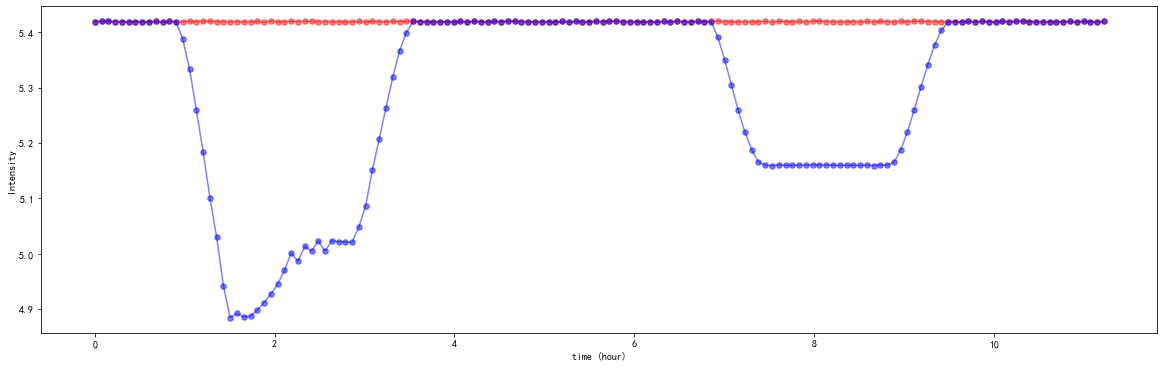

In [1]:
from ctypes import *
import numpy as np
import matplotlib.pyplot as plt
import time

start=time.time()

createBABrt = CDLL('./createBABrt.1.0.so')

# Indicates how many periods
period_num=5
# Indicates how many points per period
pointsPerPeriod=30
# Indicates how many lines of facet per Octant
nrows=22


initA=[-1,0,-1]
initB=[-1,0,0] 


# a1,a2,b1,b2,c1,c2,lambda,beta,prd,initPhase,R,P,initPhi,r,ecc,sdratio

initParam = [5, 5,  3.5, 3.5,5, 5, 156, 30, 2.2593, 0, 9, 11.9, 130, 1.1,0.06, 0.72]
    

if initParam[10]<initParam[0]+initParam[13]:
    print("error\n");
else:
    sun=-np.array(initA)
    earth=np.array(initB)-np.array(initA)

    sun=sun/np.linalg.norm(sun)
    earth=earth/np.linalg.norm(earth)
    
    solarPhase=np.arccos(np.dot(sun,earth))*180/np.pi
    print("solar phase=",solarPhase,"degs")
    if solarPhase>60:
        print("solar phase < 60 degs!")

    totalPoints=period_num*pointsPerPeriod

    params = (c_double*16)()
    A = (c_double*3)()
    B = (c_double*3)()

    for i in range(16):
        params[i] = initParam[i]
        if i<3:
            A[i]=initA[i]
            B[i]=initB[i]

    X=(c_double*totalPoints)()
    Brts=(c_double*totalPoints)()
    allFacetBrt=(c_double*totalPoints)()

    calBrightness = createBABrt.calBrightness
    calBrightness.restype = None

    calBrightness(X,Brts,allFacetBrt, A, B, params, nrows,period_num,pointsPerPeriod);

#     print(Brts)
#     print(allFacetBrt)
    
#     for i in range(150):
#         print(Brts[i],end=',')
    
#     print('\n')
    
#     for i in range(150):
#         print(allFacetBrt[i],end=',')
    

    #图形化
    plt.figure(figsize=(20,6))
    plt.plot(X,allFacetBrt,c='red',label='mutual Intensity',alpha=0.5)
    plt.scatter(X,allFacetBrt,s=30,c='red',label='mutual Intensity',alpha=0.5)
    plt.scatter(X,Brts,s=30,c="b",label='simulation Intensity',alpha=0.5)
    plt.plot(X,Brts,c="b",label='simulation Intensity',alpha=0.5)
    ax = plt.gca()
    ax.yaxis.set_ticks_position('left')
#     ax.invert_yaxis()
    plt.xlabel("time (hour)")
    plt.ylabel("Intensity")
    

    
    
    
print(time.time()-start,"seconds")